# iris species notebook

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the dataset
data = pd.read_csv("../dataset/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
# shape of the data
data.shape

(150, 6)

In [63]:
# target dstribution
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [64]:
# features
print(data.columns.tolist())

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [65]:
# dropping Id
data = data.drop("Id", axis=1)

In [66]:
# checking for missing values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [67]:
# checking for duplicates
data.duplicated().sum()

np.int64(3)

In [68]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [69]:
# brief statistical description
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## insights
- no duplicates
- dataset relatively small
- no missing values identified
- target variables are in objects form. (encode into numerical variables)

In [70]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [71]:
# encoding categorical variable
encoder = LabelEncoder()
data["Species_encoded"] = encoder.fit_transform(data["Species"])

In [72]:
data.sample(10, random_state=21)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
92,5.8,2.6,4.0,1.2,Iris-versicolor,1
44,5.1,3.8,1.9,0.4,Iris-setosa,0
7,5.0,3.4,1.5,0.2,Iris-setosa,0
21,5.1,3.7,1.5,0.4,Iris-setosa,0
95,5.7,3.0,4.2,1.2,Iris-versicolor,1
75,6.6,3.0,4.4,1.4,Iris-versicolor,1
20,5.4,3.4,1.7,0.2,Iris-setosa,0
121,5.6,2.8,4.9,2.0,Iris-virginica,2
26,5.0,3.4,1.6,0.4,Iris-setosa,0
19,5.1,3.8,1.5,0.3,Iris-setosa,0


In [73]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [74]:
data["Species_encoded"].value_counts()

Species_encoded
0    50
1    50
2    50
Name: count, dtype: int64

In [75]:
# features and target selection
X, y = data.drop(columns=["Species", "Species_encoded"]), data["Species_encoded"]
X.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [76]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_encoded, Length: 150, dtype: int64

In [77]:
print("classes", encoder.classes_)

classes ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [80]:
# spltting into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 21,
    stratify = y,
)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [82]:
# initializing the model
model = DecisionTreeClassifier(
    criterion = "entropy",
    max_depth = 3,
    random_state = 21
)

In [83]:
model.fit(
    X_train, y_train
)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,21
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [84]:
# model evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9333
Precision: 0.9444
Recall: 0.9333


In [85]:
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=encoder.classes_))



Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.80      0.89        10
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



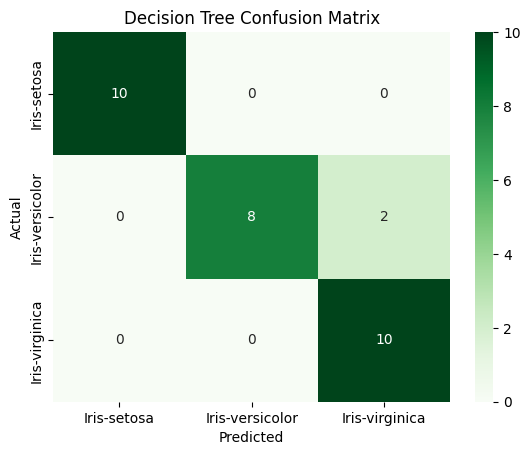

In [86]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# saving the model
import pickle
import os
os.makedirs("models", exist_ok=True)

with open("../models/model.sav", "wb") as f:
    pickle.dump(model, f)